<h1><center>Linear Discriminant Classifier</center></h1>
<hr style="border:2px solid black"> </hr>

## Imports

In [ ]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [2]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
def read_rgb(path,q):
    data =np.array([plt.imread(path+str(i)+'.jpg').reshape(-1) for i in range (0,q)])
    return data
#----------------------------------------------------------------------------------------------------------
train_air = read_rgb('Data/train/airplane/',5000)
train_auto = read_rgb('Data/train/automobile/',5000)
train_frog = read_rgb('Data/train/frog/',5000)
#----------------------------------------------------------------------------------------------------------
test_air = read_rgb('Data/test/airplane/',1000)
test_auto = read_rgb('Data/test/automobile/',1000)
test_frog = read_rgb('Data/test/frog/',1000)
#----------------------------------------------------------------------------------------------------------

X_train= np.concatenate((train_air,train_auto,train_frog),axis=0) /255
y_train = np.concatenate((np.full((len(train_air),1),1),np.full((len(train_auto),1),2),np.full((len(train_frog),1),3)),axis=0)
X_test = np.concatenate((test_air,test_auto,test_frog),axis=0) /255
y_test = np.concatenate((np.full((len(test_air),1),1),np.full((len(test_auto),1),2),np.full((len(test_frog),1),3)),axis=0)

print(X_train.shape, y_train.shape ,X_test.shape ,y_test.shape )

<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [ ]:
# Write code here
def train_classifier(target ,x_train):
    if(target == 1):
        X1 =x_train[:5000,:]
        X2=x_train[5000:15000,:]
    elif(target == 2):
        X1 =x_train[5000:10000,:]
        X2=np.concatenate ((x_train[0:5000,:], x_train[10000:15000,:]),axis=0)
    else:
        X1=x_train[10000:15000,:]
        X2 =x_train[:10000,:]
    
    m1 = np.mean(X1,axis=0)
    m2 = np.mean(X2,axis=0)

    tmp_0=(X1-m1).T
    tmp_1=(X2-m2).T

    Sw = tmp_0@tmp_0.T +tmp_1@tmp_1.T 

    W= np.linalg.pinv(Sw)@(m1-m2)
    W0 = -0.5* (W.T @(m1+m2))
    return W, W0

# Train
Y1=train_classifier(1,X_train)
Y2=train_classifier(2,X_train)
Y3=train_classifier(3,X_train)
# Test
def predict(imgs,Y1,Y2,Y3):
    y_c1= imgs@(Y1[0].reshape(imgs.shape[1],1)) +Y1[1]
    y_c2= imgs@(Y2[0].reshape(imgs.shape[1],1))+Y2[1]
    y_c3=imgs@(Y3[0].reshape(imgs.shape[1],1))+Y3[1]
    i =0
    predictions =[] 
    for i in range(0,len(imgs)):
        t1 =y_c1[i]
        t2 = y_c2[i]
        t3 = y_c3[i]
        if(t1 == max(t1,t2,t3)):
            predictions.append(1)
        elif(t2 == max(t1,t2,t3)):
            predictions.append(2)
        else:
            predictions.append(3)
    return np.asarray(predictions)


def helper(predictions):
    ones = (predictions==np.ones(1000)).sum()
    twos = (predictions==np.full((1000),2)).sum()
    threes = (predictions==np.full((1000),3)).sum()
    return ones,twos,threes

def Calulate_ConfusionMatrix(data,Y1,Y2,Y3):
    ConfusionMatrix = [[0 for i in range(len(data))] for j in range(len(data))] 
    for i in range (0,len(data)):
        predictions= predict(data[i],Y1,Y2,Y3)
        ones,twos,threes = helper(predictions)
        ConfusionMatrix[i][0]=ones
        ConfusionMatrix[i][1]=twos
        ConfusionMatrix[i][2]=threes
    return np.asarray(ConfusionMatrix)

data={0:X_test[0:1000],1:X_test[1000:2000],2:X_test[2000:3000]}

confusion_matrix = Calulate_ConfusionMatrix(data,Y1,Y2,Y3)

## Confusion Matrix (Don't Edit)

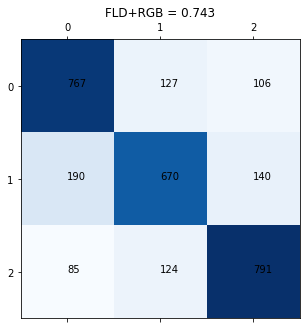

In [ ]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

### Repeat for Grayscale

In [ ]:
# Write code here
def read_gray(path,q):
    tmp=np.full((32,32,1),0)
    data=np.full((q,32*32),0)
    for i in range (0,q):
        x= plt.imread(path+str(i)+'.jpg')
        for j in range(0,32):
            for k in range(0,32):
                r = x[j][k][0]
                g = x[j][k][1]
                b = x[j][k][2]
                gray =  0.3*r + 0.59*g + 0.11 * b
                tmp[j][k][0] = gray
        data[i]=tmp.reshape(-1)
    return data

#----------------------------------------------------------------------------------------------------------
train_air = read_gray('Data/train/airplane/',5000)
train_auto = read_gray('Data/train/automobile/',5000)
train_frog = read_gray('Data/train/frog/',5000)
#----------------------------------------------------------------------------------------------------------
test_air = read_gray('Data/test/airplane/',1000)
test_auto = read_gray('Data/test/automobile/',1000)
test_frog = read_gray('Data/test/frog/',1000)
#----------------------------------------------------------------------------------------------------------

X_train= np.concatenate((train_air,train_auto,train_frog),axis=0) 
y_train = np.concatenate((np.full((len(train_air),1),1),np.full((len(train_auto),1),2),np.full((len(train_frog),1),3)),axis=0)
X_test = np.concatenate((test_air,test_auto,test_frog),axis=0) 
y_test = np.concatenate((np.full((len(test_air),1),1),np.full((len(test_auto),1),2),np.full((len(test_frog),1),3)),axis=0)

print(X_train.shape, y_train.shape ,X_test.shape ,y_test.shape )
# Train
Y1=train_classifier(1,X_train)
Y2=train_classifier(2,X_train)
Y3=train_classifier(3,X_train)
# Test
data={0:X_test[0:1000],1:X_test[1000:2000],2:X_test[2000:3000]}

confusion_matrix = Calulate_ConfusionMatrix(data,Y1,Y2,Y3)

(15000, 1024) (15000, 1) (3000, 1024) (3000, 1)


## Confusion Matrix (Don't Edit)

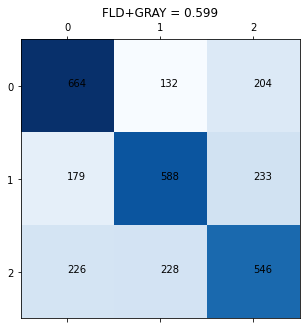

In [ ]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))